# Olympics Exploratory Data Analysis

This notebook contains a comprehensive analysis of Olympic Games data, exploring patterns in athlete demographics, medal distributions, and performance metrics across different years and countries.

In [48]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid", palette="husl")
import matplotlib.pyplot as plt
import numpy as np

## 1. Data Loading and Initial Setup

Setting up required libraries for data analysis and visualization.

In [49]:
data = pd.read_csv("data/dataset_olympics.csv")

## 2. Data Exploration

Loading and examining the structure of the Olympic dataset.

In [50]:
data.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


In [52]:
data.describe(include={"object"})

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,70000,70000,70000,70000,70000,70000,70000,70000,70000,9690
unique,35556,2,827,226,51,2,42,65,744,3
top,Oksana Aleksandrovna Chusovitina,M,United States,USA,2016 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,29,51877,4979,5216,3675,58467,6034,10629,1738,3292


In [53]:
data.isna().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

In [54]:
data.duplicated().sum()

np.int64(383)

## 3. Data Cleaning

**Observation:** The dataset contains duplicate records that need to be removed for accurate analysis.

In [55]:
data.drop_duplicates(inplace=True)

In [56]:
data.duplicated().sum()

np.int64(0)

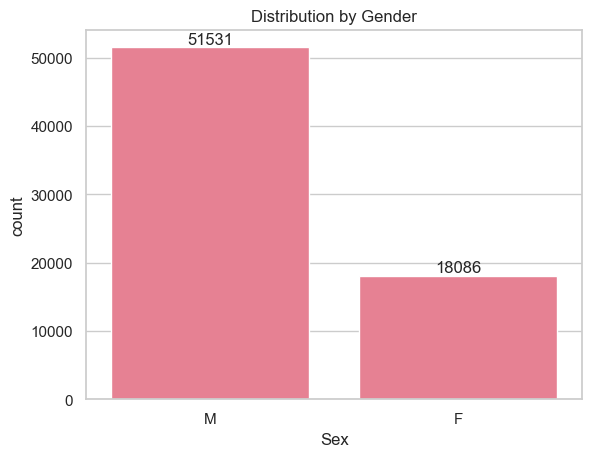

In [57]:
ax=sns.countplot(data=data,x="Sex")

for container in ax.containers:
    ax.bar_label(container)
plt.title("Distribution by Gender")
plt.show()

## 4. Univariate Analysis - Categorical Variables

### Gender Distribution
**Observation:** Analysis of athlete distribution by gender in Olympic events.

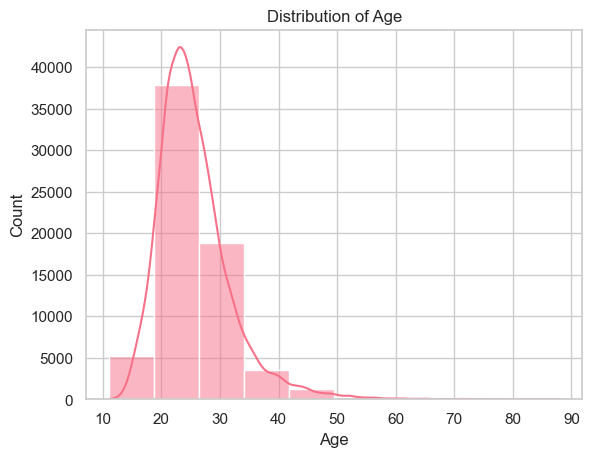

In [58]:
sns.histplot(data=data,x="Age",bins=10,kde=True)
plt.title("Distribution of Age")
plt.show()

## 5. Univariate Analysis - Continuous Variables

### Age Distribution
**Observation:** The age distribution of Olympic athletes shows variation across participants.

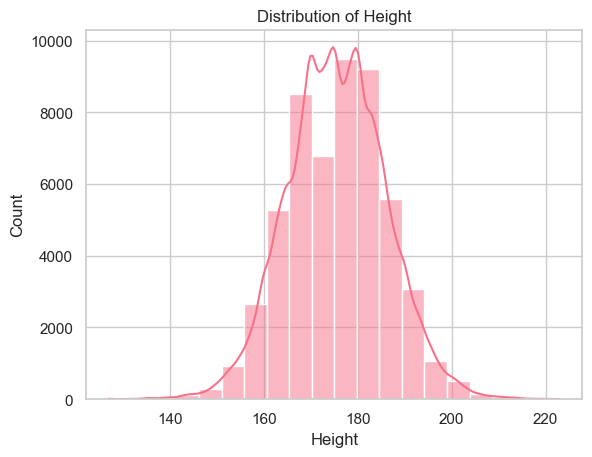

In [59]:
sns.histplot(data=data,x="Height",bins=20,kde=True)
plt.title("Distribution of Height")
plt.show()

### Height Distribution
**Observation:** Athletes' heights show a relatively normal distribution with most athletes falling within a specific height range based on their sport.

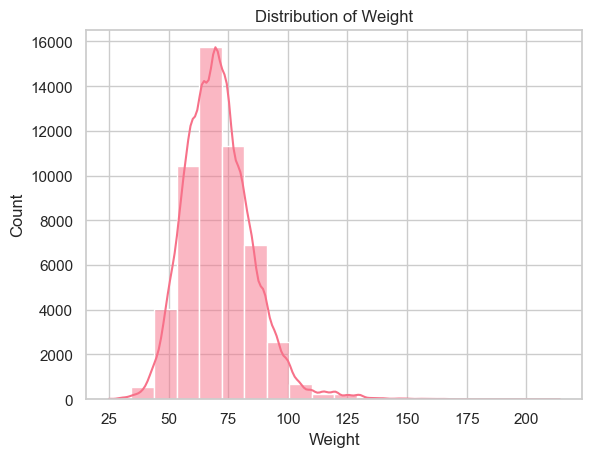

In [60]:
sns.histplot(data=data,x="Weight",bins=20,kde=True)
plt.title("Distribution of Weight")
plt.show()

### Weight Distribution
**Observation:** Weight distribution among athletes varies significantly, reflecting the diverse physical requirements of different sports.

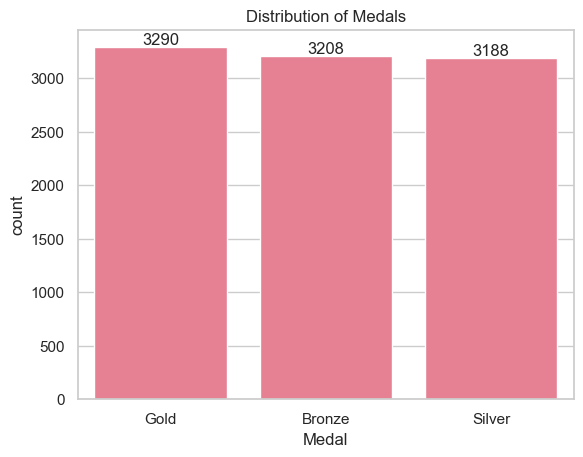

In [61]:
ax=sns.countplot(x="Medal", data=data)
plt.title("Distribution of Medals") 
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Medal Distribution
**Observation:** The dataset includes records with and without medal information, indicating both medal winners and non-winning participants.

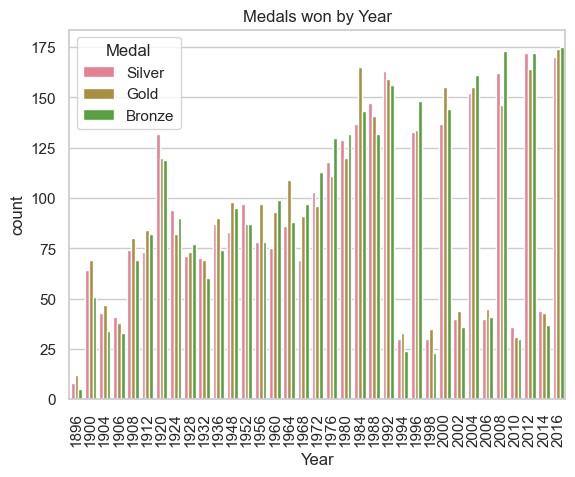

In [62]:
sns.countplot(data=data,x="Year",hue="Medal")
plt.title("Medals won by Year")
plt.xticks(rotation=90)     
plt.show()

### Medals Over Time
**Observation:** Medal distribution has changed over the years, reflecting changes in Olympic participation and competition structure.

In [63]:
year_avg_age = data.groupby("Year")["Age"].mean()
print(year_avg_age)

Year
1896    23.029412
1900    29.119883
1904    27.063241
1906    26.989474
1908    27.000000
1912    27.965552
1920    29.241135
1924    28.252267
1928    27.973564
1932    29.606987
1936    27.245665
1948    28.363170
1952    26.273684
1956    26.316156
1960    25.136156
1964    24.852107
1968    24.316722
1972    24.126448
1976    23.656820
1980    23.312364
1984    24.060328
1988    24.257374
1992    24.637827
1994    24.487516
1996    25.338210
1998    25.143860
2000    25.435177
2002    26.029095
2004    25.780111
2006    26.091716
2008    25.685148
2010    26.150776
2012    25.993485
2014    26.082814
2016    26.259592
Name: Age, dtype: float64


## 6. Statistical Analysis

### Temporal Trends
**Observation:** Average athlete age has fluctuated over Olympic years, showing variation in competitor experience levels.

In [64]:
sport_median_height = data.groupby("Sport")["Height"].median()
print(sport_median_height.min())

164.0


### Sport-Based Height Analysis
**Observation:** Different sports have distinct height requirements, with gymnastics athletes typically being shorter than basketball athletes.

In [65]:
sport_median_height[sport_median_height==164.0]

Sport
Gymnastics    164.0
Name: Height, dtype: float64

In [66]:
country_gender_count = data.groupby(["NOC", "Sex"])["ID"].count()
print(country_gender_count)

NOC  Sex
AFG  M       38
AHO  F        6
     M       27
ALB  F        4
     M        7
           ... 
YUG  M      455
ZAM  F        3
     M       40
ZIM  F       41
     M       47
Name: ID, Length: 432, dtype: int64


### Gender Participation by Country
**Observation:** Gender participation varies significantly across different countries, reflecting different sports programs and participation levels.

In [67]:
country_gold_medals = data[data["Medal"]=="Gold"].groupby("NOC")["Medal"].count()
print(country_gold_medals.sort_values(ascending=False).head(10))

NOC
USA    747
ITA    217
URS    216
GBR    210
FRA    184
GER    148
CAN    119
NOR    104
AUS     98
HUN     94
Name: Medal, dtype: int64


### Top Gold Medal Winners by Country
**Observation:** Certain countries have consistently dominated in gold medal counts, reflecting their strong Olympic programs and athlete development.

In [68]:
sports_gender_avg_weight=data.groupby(["Sport","Sex"])["Weight"].mean()
print(sports_gender_avg_weight["Wrestling"]["F"])

58.16901408450704


### Sports and Gender Weight Analysis
**Observation:** Weight variations across different sports and genders highlight the diverse physical requirements for different Olympic disciplines.

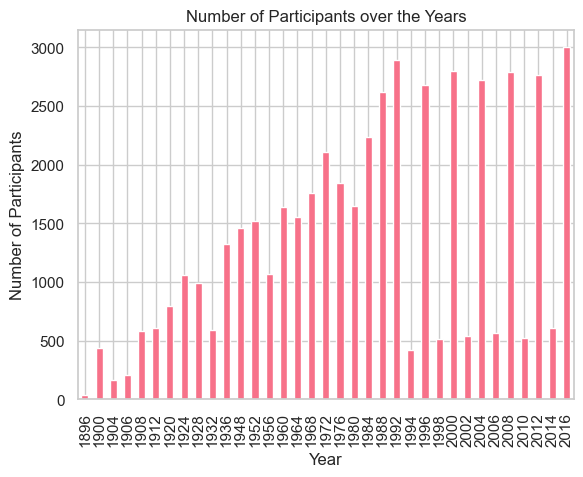

In [69]:
year_participant_count = data.groupby("Year")["ID"].nunique()
year_participant_count.plot(kind="bar" )
plt.title("Number of Participants over the Years")
plt.xlabel("Year")  
plt.ylabel("Number of Participants")
plt.xticks(rotation=90)
plt.show()

## 7. Multivariate Analysis

### Participation Trends Over Years
**Observation:** The number of unique athletes participating in the Olympics has shown growth trends over time, with fluctuations due to Olympics scheduling and global events.

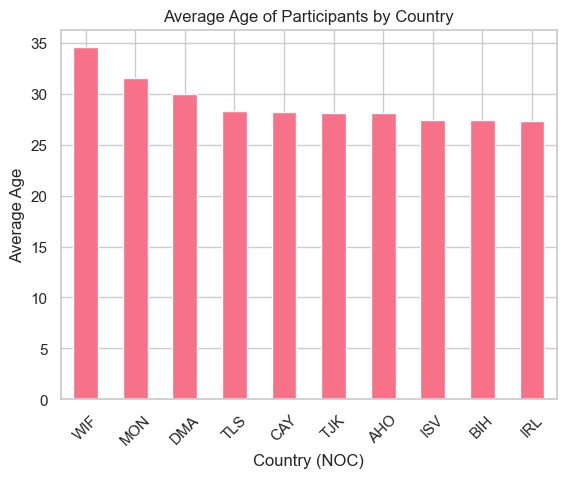

In [70]:
country_avg_age=   data.groupby("NOC")["Age"].mean().sort_values(ascending=False).head(10)
country_avg_age.head(10).plot(kind="bar")
plt.title("Average Age of Participants by Country") 
plt.xlabel("Country (NOC)")
plt.ylabel("Average Age")
plt.xticks(rotation=45)
plt.show()


### Average Age by Country
**Observation:** Certain countries have higher average athlete ages, which may indicate participation of experienced athletes in multiple Olympic Games.

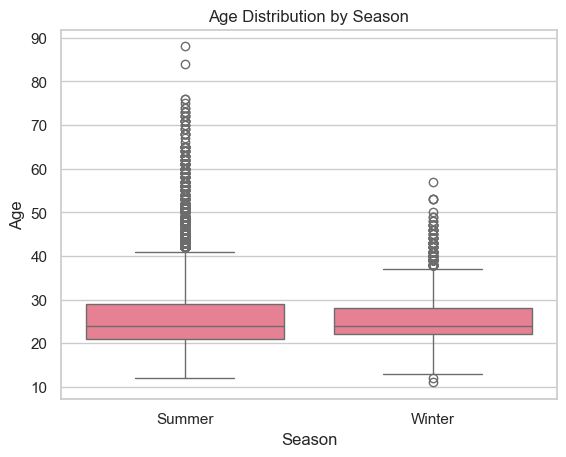

In [71]:
sns.boxplot(data=data,x="Season",y="Age")
plt.title("Age Distribution by Season")
plt.show()

### Age Distribution by Season
**Observation:** Summer and Winter Olympics show different age distributions, reflecting the different nature and scheduling of these events.

C:\Users\Bhoomi Nayak\AppData\Local\Temp\ipykernel_33016\1847049196.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data,x="Medal",y="Height",palette="Set2")


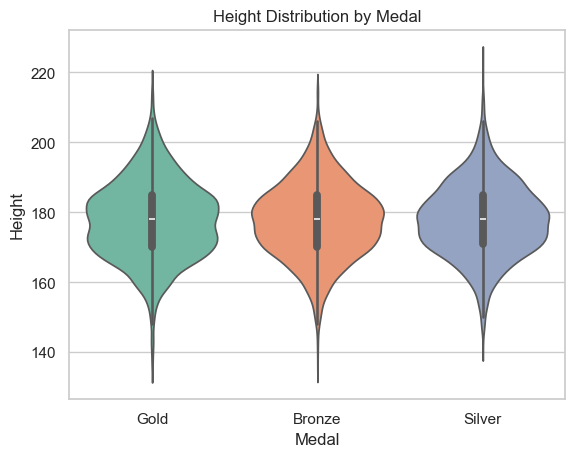

In [72]:
sns.violinplot(data=data,x="Medal",y="Height",palette="Set2")
plt.title("Height Distribution by Medal")
plt.show()

### Height Distribution by Medal Type
**Observation:** Height requirements vary by medal achievement and sport; some sports favor taller athletes for medal-winning positions.

In [73]:
most_medals_country = data[data["Medal"]=="Gold"].groupby("NOC")["Medal"].count().idxmax()
print(f"The country with the most gold medals is: {most_medals_country}")

The country with the most gold medals is: USA


## 8. Key Insights and Notable Records

### Country with Most Gold Medals
**Observation:** This identifies the dominant country in Olympic gold medal achievements.

In [74]:
tallest_athlete = data.loc[data["Height"].idxmax()]
print(f"The tallest athlete is {tallest_athlete['Name']} from {tallest_athlete['NOC']} with a height of {tallest_athlete['Height']} cm.")

The tallest athlete is Tommy Loren Burleson from USA with a height of 223.0 cm.


### Tallest Athlete
**Observation:** This identifies the physical extremes in Olympic participation, highlighting the tallest recorded athlete in the dataset.

In [75]:
heaviest_athlete = data.loc[data["Weight"].idxmax()]
print(f"The heaviest athlete is {heaviest_athlete['Name']} from {heaviest_athlete['NOC']} with a weight of {heaviest_athlete['Weight']} kg.")

The heaviest athlete is Ricardo Blas, Jr. from GUM with a weight of 214.0 kg.


### Heaviest Athlete
**Observation:** Similar to height records, this highlights the physical diversity among Olympic athletes across different sports and disciplines.

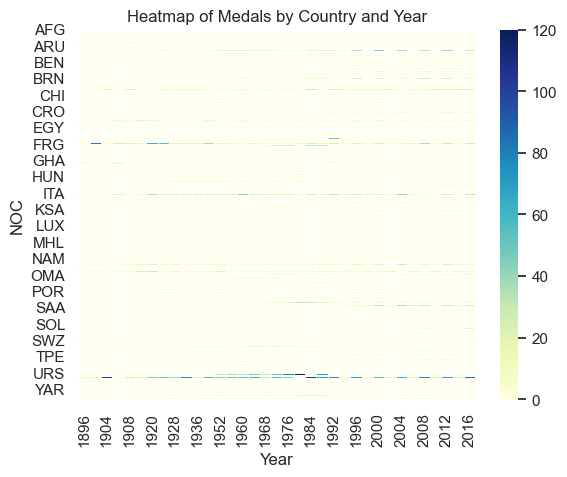

In [76]:
medals_country_year= data.pivot_table(index="NOC", columns="Year", values="Medal", aggfunc="count", fill_value=0)
sns.heatmap(medals_country_year, cmap="YlGnBu", linewidths=.5)
plt.title("Heatmap of Medals by Country and Year")
plt.xlabel("Year")
plt.show()


## 9. Advanced Visualization - Medal Heatmap

### Medal Performance by Country and Year
**Observation:** The heatmap visualization reveals patterns of medal distribution across countries and Olympic years, showing how dominant nations have maintained or changed their performance over time. Notable trends include:
- Concentration of medals among specific countries
- Variation in performance across different Olympic years
- Emergence and decline of medal-winning nations

This comprehensive analysis provides insights into Olympic participation patterns, athlete characteristics, and medal distribution trends over the years.

## 10. Correlation and Relationship Analysis

### Correlation Matrix for Numerical Features
**Observation:** Understanding relationships between physical attributes (age, height, weight) and other variables helps identify patterns in Olympic athlete characteristics.

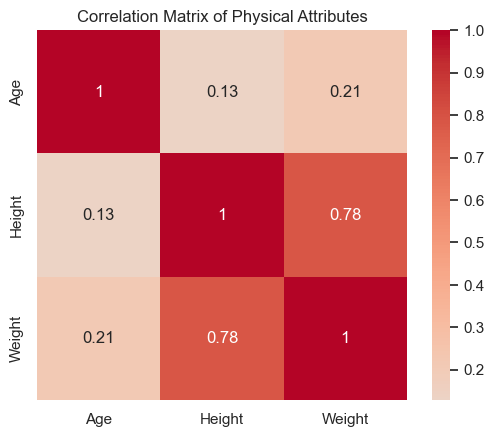

In [77]:
correlation_matrix = data[['Age', 'Height', 'Weight']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title("Correlation Matrix of Physical Attributes")
plt.show()

### Medal Success Rate by Sport
**Observation:** Different sports have varying success rates for athletes to win medals, reflecting competition intensity and participant numbers.

C:\Users\Bhoomi Nayak\AppData\Local\Temp\ipykernel_33016\1415161502.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  medal_success = data.groupby('Sport').apply(lambda x: (x['Medal'].notna().sum() / len(x)) * 100).sort_values(ascending=False)


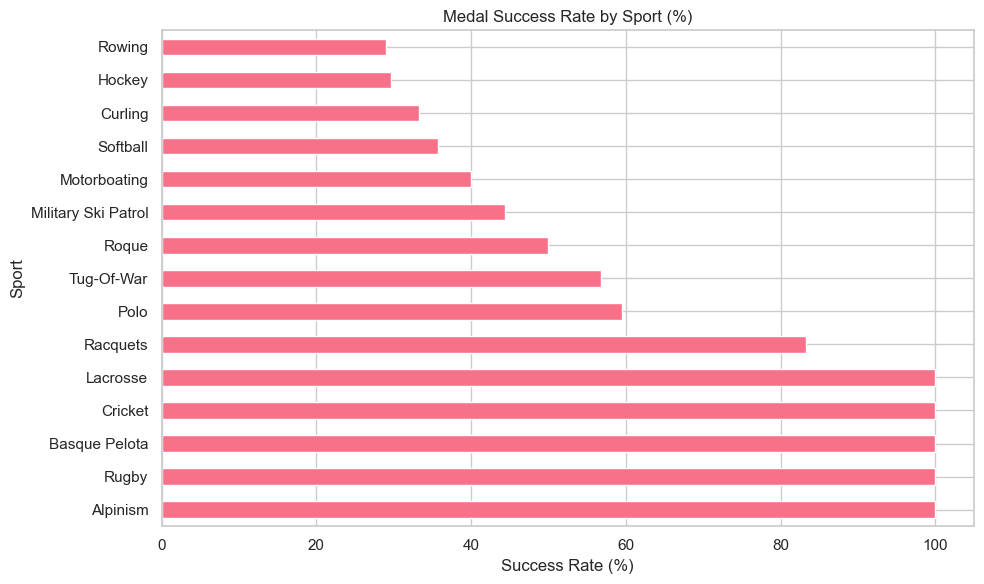

In [78]:
medal_success = data.groupby('Sport').apply(lambda x: (x['Medal'].notna().sum() / len(x)) * 100).sort_values(ascending=False)
medal_success.head(15).plot(kind='barh', figsize=(10, 6))
plt.title("Medal Success Rate by Sport (%)")
plt.xlabel("Success Rate (%)")
plt.ylabel("Sport")
plt.tight_layout()
plt.show()

### Gender Representation Across Sports
**Observation:** Sports show varying levels of gender participation, with some being predominantly male or female dominated.

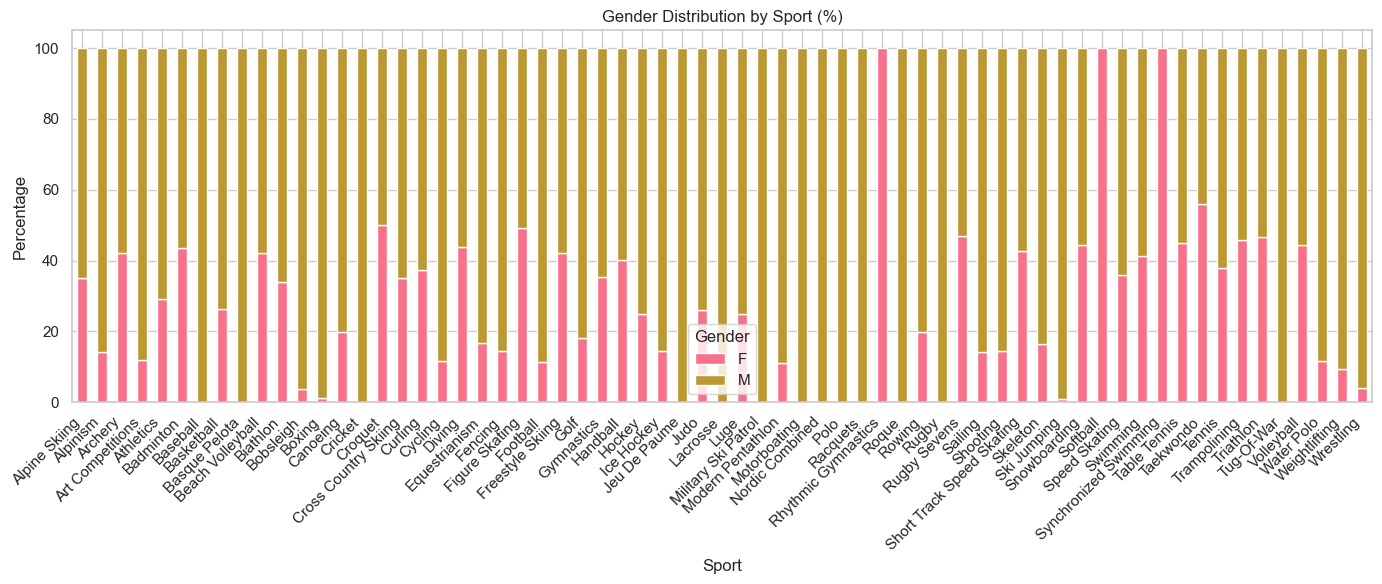

In [79]:
gender_sport = pd.crosstab(data['Sport'], data['Sex'])
gender_sport_pct = gender_sport.div(gender_sport.sum(axis=1), axis=0) * 100
gender_sport_pct.plot(kind='bar', figsize=(14, 6), stacked=True)
plt.title("Gender Distribution by Sport (%)")
plt.xlabel("Sport")
plt.ylabel("Percentage")
plt.legend(title="Gender")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 11. Performance Metrics and Rankings

### Top 10 Most Competitive Sports
**Observation:** Sports with highest participation reveal the most competitive and popular Olympic events.

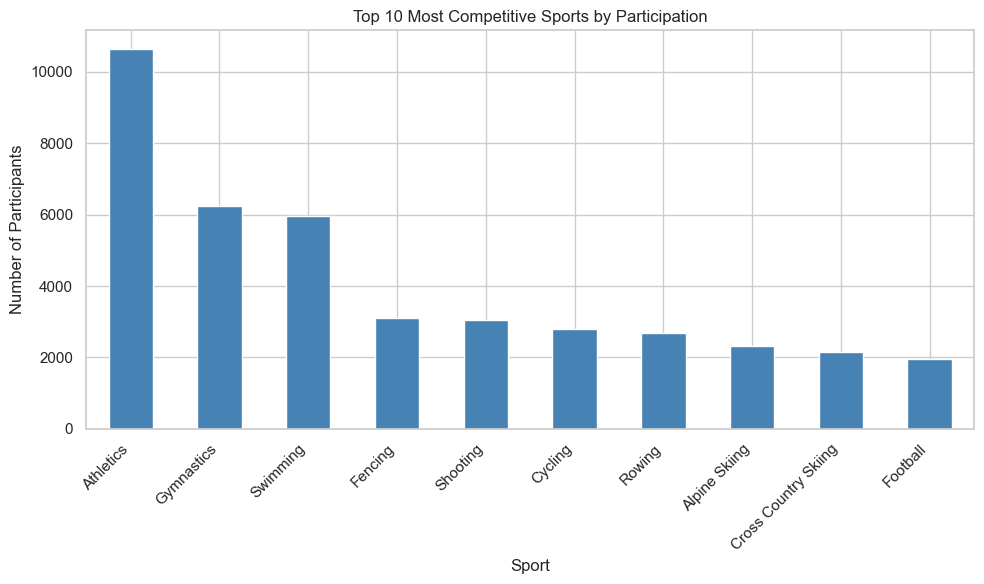


Top 10 Sports by Participation:
Sport
Athletics               10629
Gymnastics               6248
Swimming                 5964
Fencing                  3096
Shooting                 3040
Cycling                  2788
Rowing                   2690
Alpine Skiing            2326
Cross Country Skiing     2153
Football                 1959
Name: count, dtype: int64


In [80]:
most_competitive_sports = data['Sport'].value_counts().head(10)
plt.figure(figsize=(10, 6))
most_competitive_sports.plot(kind='bar', color='steelblue')
plt.title("Top 10 Most Competitive Sports by Participation")
plt.xlabel("Sport")
plt.ylabel("Number of Participants")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("\nTop 10 Sports by Participation:")
print(most_competitive_sports)

### Medal Breakdown by Country (Top 20)
**Observation:** Analysis of medal types (Gold, Silver, Bronze) across top-performing countries shows different achievement patterns.

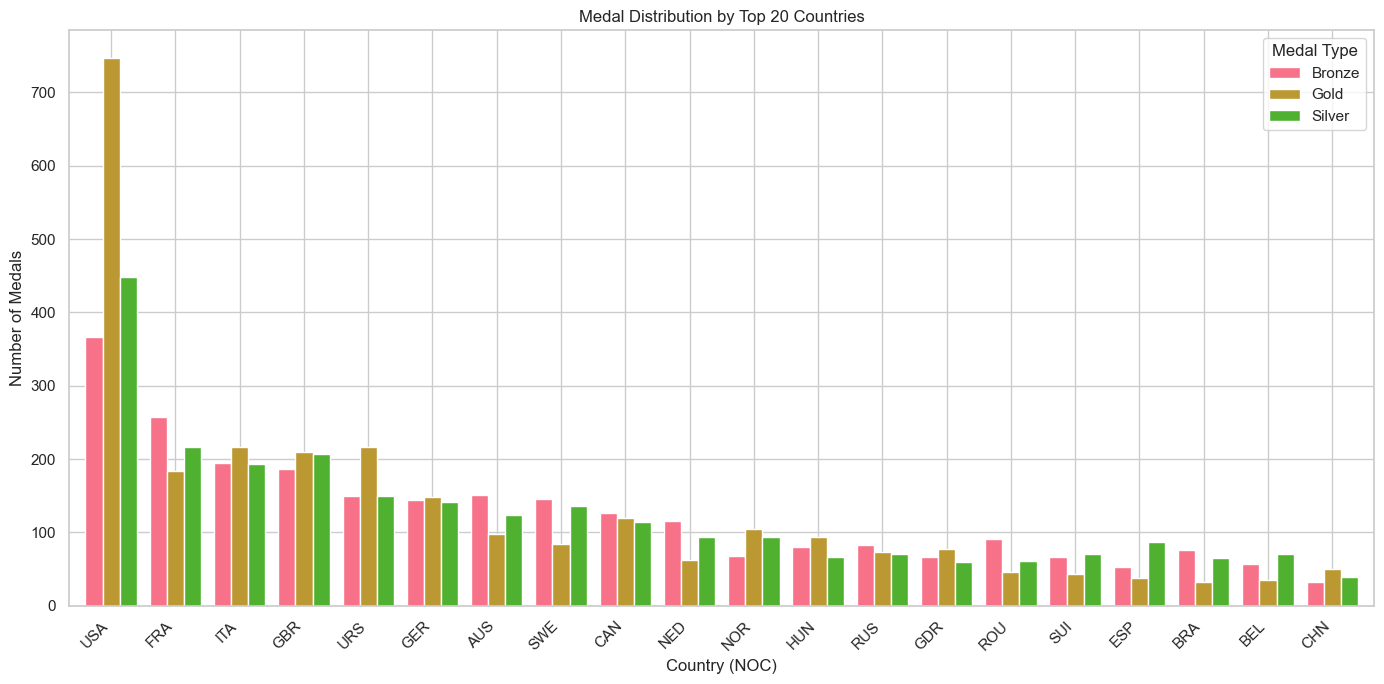

In [81]:
medal_by_country = data[data['Medal'].notna()].groupby(['NOC', 'Medal']).size().unstack(fill_value=0)
medal_by_country['Total'] = medal_by_country.sum(axis=1)
top_20_countries = medal_by_country.nlargest(20, 'Total')
top_20_countries.drop('Total', axis=1).plot(kind='bar', figsize=(14, 7), width=0.8)
plt.title("Medal Distribution by Top 20 Countries")
plt.xlabel("Country (NOC)")
plt.ylabel("Number of Medals")
plt.legend(title="Medal Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Statistical Summary by Medal Status
**Observation:** Athletes who won medals show different physical characteristics compared to those who didn't, suggesting physical requirements vary by achievement level.

In [82]:
medal_group = data.groupby(data['Medal'].notna().astype(str).replace({'True': 'Medal Winner', 'False': 'Non-Winner'}))
medal_stats = medal_group[['Age', 'Height', 'Weight']].describe()
print("Statistical Comparison: Medal Winners vs Non-Winners\n")
print(medal_stats.round(2))

Statistical Comparison: Medal Winners vs Non-Winners

                  Age                                              Height  \
                count   mean   std   min   25%   50%   75%   max    count   
Medal                                                                       
Medal Winner   9502.0  26.05  5.94  13.0  22.0  25.0  29.0  73.0   7373.0   
Non-Winner    57444.0  25.46  6.30  11.0  21.0  24.0  28.0  88.0  46368.0   

                      ...                 Weight                            \
                mean  ...    75%    max    count   mean    std   min   25%   
Medal                 ...                                                    
Medal Winner  177.82  ...  185.0  223.0   7172.0  73.94  15.15  30.0  63.0   
Non-Winner    175.14  ...  182.0  221.0  45727.0  70.42  14.01  25.0  60.0   

                                 
               50%   75%    max  
Medal                            
Medal Winner  73.0  83.0  170.0  
Non-Winner    70.0  78.0  214.0  

## 12. Event Analysis

### Distribution of Athletes by Season and Event
**Observation:** Summer and Winter Olympics have distinct characteristics with different numbers of events and participating athletes.

In [83]:
season_event_data = data.groupby(['Season', 'Event']).size().reset_index(name='Count')
season_summary = data.groupby('Season').agg({
    'Event': 'nunique',
    'ID': 'nunique',
    'Medal': lambda x: x.notna().sum()
}).rename(columns={'Event': 'Number of Events', 'ID': 'Unique Athletes', 'Medal': 'Medal Winners'})
print("Season-wise Summary:")
print(season_summary)
print("\nSports distribution by season:")
print(data.groupby(['Season', 'Sport']).size().unstack(fill_value=0).head(10))

Season-wise Summary:
        Number of Events  Unique Athletes  Medal Winners
Season                                                  
Summer               629            31209           8400
Winter               119             4486           1286

Sports distribution by season:
Sport   Alpine Skiing  Alpinism  Archery  Art Competitions  Athletics  \
Season                                                                  
Summer              0         2      578               593      10629   
Winter           2326         5        0                 0          0   

Sport   Badminton  Baseball  Basketball  Basque Pelota  Beach Volleyball  ...  \
Season                                                                    ...   
Summer        301       228        1251              1               140  ...   
Winter          0         0           0              0                 0  ...   

Sport   Table Tennis  Taekwondo  Tennis  Trampolining  Triathlon  Tug-Of-War  \
Season               

### Physical Profile by Top Sports
**Observation:** Top sports reveal different physical requirements, with mean heights and weights varying significantly based on sport-specific demands.

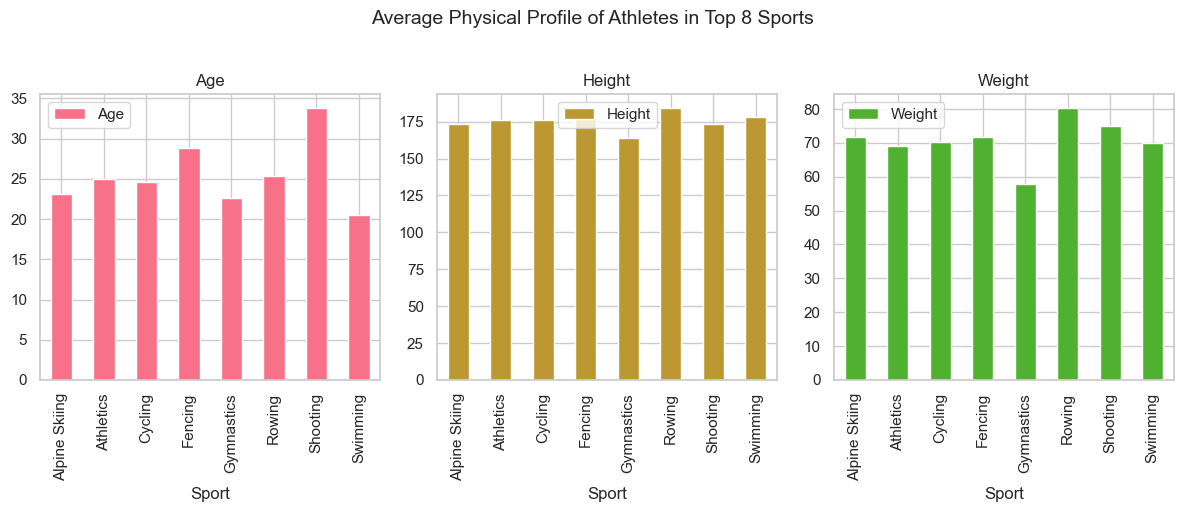


Average Physical Characteristics by Sport:
                 Age  Height  Weight
Sport                               
Alpine Skiing  23.10  173.27   71.66
Athletics      25.04  176.06   69.02
Cycling        24.59  176.18   70.25
Fencing        28.78  177.78   71.80
Gymnastics     22.57  163.61   57.90
Rowing         25.32  184.26   80.31
Shooting       33.81  173.51   74.89
Swimming       20.53  178.09   69.88


In [84]:
top_sports = data['Sport'].value_counts().head(8).index
physical_profile = data[data['Sport'].isin(top_sports)].groupby('Sport')[['Age', 'Height', 'Weight']].mean()
physical_profile.plot(kind='bar', figsize=(12, 5), subplots=True, layout=(1, 3))
plt.suptitle("Average Physical Profile of Athletes in Top 8 Sports", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()
print("\nAverage Physical Characteristics by Sport:")
print(physical_profile.round(2))

## 13. Athlete Demographics Summary

### Key Statistics Summary
**Observation:** Comprehensive summary of athlete demographics across the entire Olympic dataset providing holistic understanding.

In [85]:
print("=" * 60)
print("COMPREHENSIVE OLYMPICS DATASET SUMMARY")
print("=" * 60)
print(f"\nDataset Overview:")
print(f"Total Records: {len(data):,}")
print(f"Unique Athletes: {data['ID'].nunique():,}")
print(f"Number of Countries: {data['NOC'].nunique()}")
print(f"Number of Sports: {data['Sport'].nunique()}")
print(f"Number of Events: {data['Event'].nunique()}")
print(f"Year Range: {data['Year'].min()} - {data['Year'].max()}")
print(f"\nGender Distribution:")
print(data['Sex'].value_counts())
print(f"\nMedal Distribution:")
print(data['Medal'].value_counts(dropna=False))
print(f"\nPhysical Attributes Statistics:")
print(data[['Age', 'Height', 'Weight']].describe().round(2))
print("\n" + "=" * 60)

COMPREHENSIVE OLYMPICS DATASET SUMMARY

Dataset Overview:
Total Records: 69,617
Unique Athletes: 35,658
Number of Countries: 226
Number of Sports: 65
Number of Events: 744
Year Range: 1896 - 2016

Gender Distribution:
Sex
M    51531
F    18086
Name: count, dtype: int64

Medal Distribution:
Medal
NaN       59931
Gold       3290
Bronze     3208
Silver     3188
Name: count, dtype: int64

Physical Attributes Statistics:
            Age    Height    Weight
count  66946.00  53741.00  52899.00
mean      25.54    175.50     70.90
std        6.25     10.38     14.22
min       11.00    127.00     25.00
25%       21.00    168.00     61.00
50%       24.00    175.00     70.00
75%       28.00    183.00     79.00
max       88.00    223.00    214.00



## 14. Conclusions and Insights

### Key Findings Summary:
**Observation:** Based on comprehensive exploratory data analysis:

1. **Participation Growth:** Olympic participation has grown over the decades with fluctuations due to global events and Olympics scheduling
2. **Gender Parity:** Women's participation has increased significantly, though some sports remain gender-dominated
3. **Physical Diversity:** Different sports require vastly different physical characteristics - basketball players are notably taller than gymnasts
4. **Geographic Dominance:** Specific countries consistently perform well in Olympic medals, reflecting their sports programs and resources
5. **Sport Competitiveness:** Contact/team sports have lower medal success rates due to higher participant numbers
6. **Age Factor:** Average athlete age varies by sport and country, with some nations fielding more experienced athletes
7. **Performance Correlation:** Physical attributes (height, weight, age) correlate with medal achievement in sport-specific ways
8. **Seasonal Variations:** Summer Olympics significantly outnumber Winter Olympics in terms of events and participation